**Project: Unsupervised Learning - Clustering**

**Student Number: 166895**

- Goal of this assignment is to cluster patients.

In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## **2. Create a dataframe called diabetes_df based on the dataset downloaded. Analyze it and observe the attributes.?**

In [3]:
#loading the dataset
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/JosephRidge/Applied-ML/refs/heads/main/Assignment%207/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
# Descriptive Statistics
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insights:**

- **Pregnancies:**   
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average, the women in the dataset have had about 3.85 pregnancies.
    - The mean>median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum number of pregnancies in the dataset is 0 while the maximum is 17. Thus some women experienced high number of pregnancies
- **Glucose:**
    - Has 768 data points.
    - The average glucose level for the women in the dataset is approximately 120.89 mg/dL.
    - The mean (120.89) is greater than the median (117), indicating that the data is skewed to the right.
    - he minimum glucose level is 0  and the maximum is 199 mg/dL.
    
- **Blood Pressure:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average blood pressure for the women in the dataset is about 69.105.
    - The mean< median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
    - The minimum  blood pressure in the dataset is 0 while the maximum is 122. 
- **SkinThickness:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average skin thickess for the women in the dataset is about 20.53.
    - The mean< median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
    - The minimum skin thickness in the dataset is 0 while the maximum is 99.  
- **Insulin	:**
    - Number of records: 768
    - Has a maximum value of 846 and a minimum value of 0
    - The mean is greater than the median hence the is data is experiencing skewness
    - The values fall between 0(the minimum) and 846(maximum) anything above or below it can be regarded as an outlier
    - On average, the insulin levels in the dataset were at 79.8
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum skin thickness in the dataset is 0 while the maximum is 67.  

- **BMI:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average BMI for the women in the dataset is about 31.99.
    - The mean is slightly less than median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
    - The minimum BMI in the dataset is 0 while the maximum is 67.10.   

- **DiabetesPedigreeFunction:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average DiabetesPedigree Function for the women in the dataset is about 0.47.
    - The mean is greater than median(50%), thus implying the variable is skewed to the right, which is represented by the standard deviation also.
    - The minimum DiabetesPedigree Function in the dataset is 0.078 while the maximum is 2.42.  

- **Age:**
    - Number of records: 768
    - Has a maximum value of 81 and a minimum value of 21
    - The mean is greater than the median hence the is data is experiencing skewness
    - The values fall between 21(the minimum) and 81(maximum) anything above or below it can be regarded as an outlier
    - On average, the age in the dataset were at 33.2
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum age in the dataset is 21 while the maximum is 81. Thus the largest age group fall in older group  

- **Outcome:**
    - Outcome:
    - Number of records: 768
    - Has a maximum value of 1 and a minimum value of 0
    - The mean is greater than the median hence the is data is experiencing skewness
    - The values fall between 0(the minimum) and 1(maximum) anything above or below it can be regarded as an outlier
    - On average, the outcome fall at 0.35.
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum number of outcomes in the dataset is 0 while the maximum is 1

## **3. From here you have to explore the data and extract all the knowledge you can. Follow these steps:?**

### **a. Considering all the attributes of the dataset, except for the ’Outcome’. Create a normalized version of it (saved in a numpy array called data_clusters).?**

In [7]:
# Defining X and y
X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']


# Normalizing the dataset using StandardScaler
scaler = StandardScaler()
data_clusters = scaler.fit_transform(X)
data_clusters

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### **b. Using the k-means Clustering algorithm provided by the sklearn Python library, we generate a graphical representation of the SSE (sum of squared errors) vs. number of clusters. If we wanted to use the elbow rule seen in theory, how many clusters would we use? Is it a practical value??**

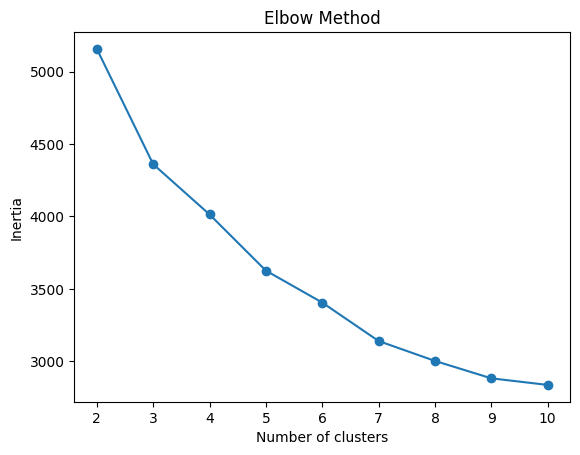

In [8]:
# Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clusters)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- We look for a point where the inertia starts decreasing more slowly (forming an "elbow" shape). This point indicates the optimal number of clusters, as adding more clusters beyond this point doesn’t significantly reduce inertia. The "elbow" point suggests a balance between having fewer clusters and minimizing within-cluster variance.


- In this case we will use 4 clusters in this task.


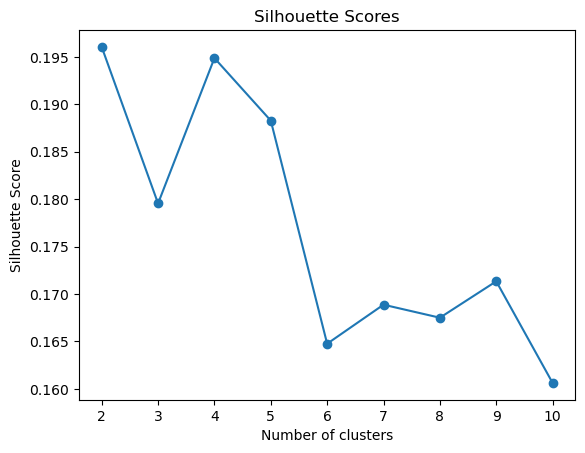

In [23]:
# Attempting the silhoute score
# Silhouette Score for each number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_clusters)
    score = silhouette_score(data_clusters, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

- The Elbow technique for choosing the best value for the number of clusters is rather coarse.A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coecient over all the instances.

- Both the elbow method and the silhouette score indicate that 4 clusters is the optimal choice for our dataset.

### **c. Now we apply the k-means algorithm to generate 3 clusters. Once created, analyze the centers of the clusters obtained. We now show the centers of each cluster and the number of elements in each of them. What attributes determine the most notable differences between clusters?**

In [9]:
# Step 1: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(data_clusters)  # Transform the normalized data


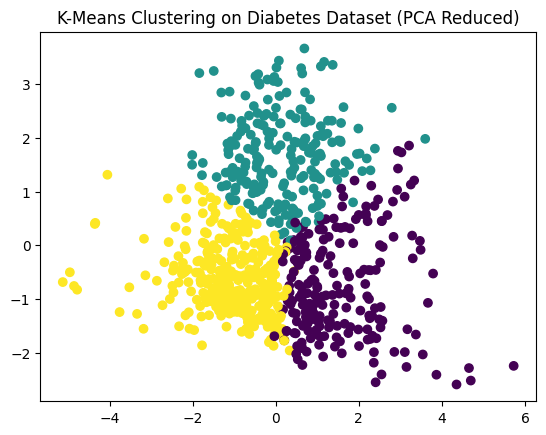

Davies-Bouldin Score (K-Means): 1.6776256163838508


In [10]:
# Evaluate K-Means using Davies-Bouldin score (a measure of cluster quality)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(data_clusters)
labels_kmeans = kmeans_3.labels_

# Visualize the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering on Diabetes Dataset (PCA Reduced)')
plt.show()

# Davies-Bouldin Score (lower is better, measures the ratio of intra-cluster to inter-cluster distance)
db_score = davies_bouldin_score(data_clusters, labels_kmeans)
print(f'Davies-Bouldin Score (K-Means): {db_score}')

In [25]:
# Get the cluster centers 
cluster_centers = kmeans_3.cluster_centers_

# Get the number of elements in each cluster
cluster_labels = kmeans_3.labels_
_, counts = np.unique(cluster_labels, return_counts=True)

# Show cluster centers and element counts
print("Cluster Centers:\n", cluster_centers)
print("\nNumber of elements in each cluster:", counts)


Cluster Centers:
 [[-0.35819002  0.55983946  0.22359726  0.89652484  0.97458723  0.62331635
   0.38707461 -0.22179196]
 [-0.46067918 -0.54843901 -0.41228464 -0.33221423 -0.37997137 -0.44368966
  -0.21923475 -0.59010462]
 [ 1.08194386  0.2972029   0.42159496 -0.37996824 -0.38353716  0.06924224
  -0.04523723  1.14777824]]

Number of elements in each cluster: [216 337 215]


- We have 8 columns hence the 8 points in the array of centres.
- Second cluster has the highest number of elements (337 elements).
- First cluster has 216 elements.
- Third cluster has 215 elements


**Next step is understanding the difference between the cluster**

In [45]:
# Create a DataFrame for cluster centers 
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_centers_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.358190,0.559839,0.223597,0.896525,0.974587,0.623316,0.387075,-0.221792
1,-0.460679,-0.548439,-0.412285,-0.332214,-0.379971,-0.443690,-0.219235,-0.590105
2,1.081944,0.297203,0.421595,-0.379968,-0.383537,0.069242,-0.045237,1.147778


<Figure size 1000x600 with 0 Axes>

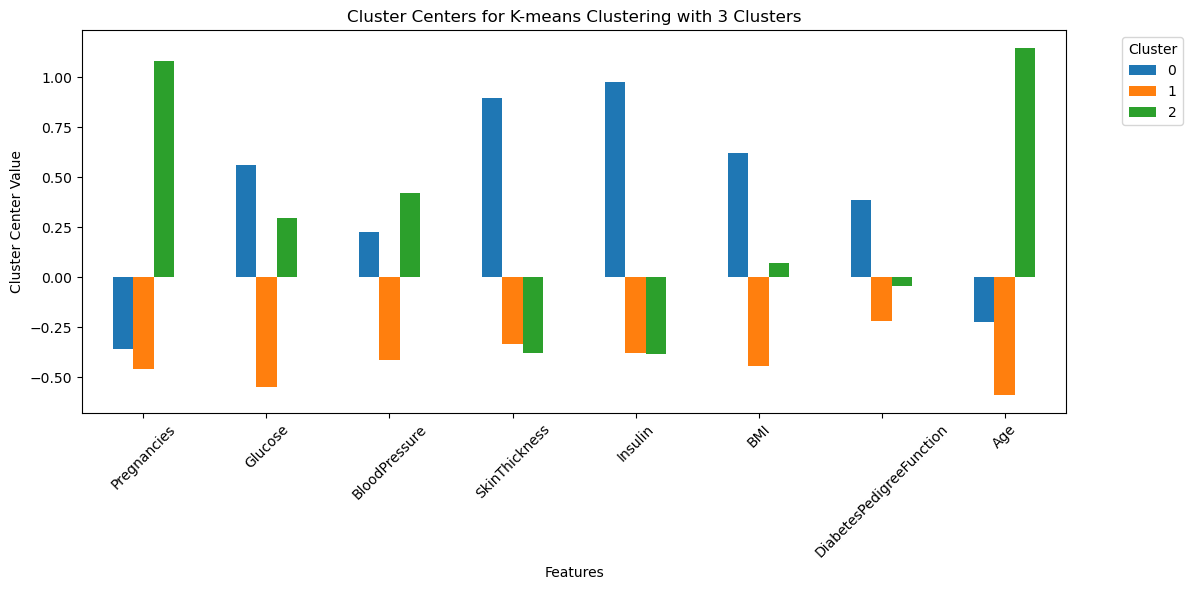

In [46]:
# Plotting the cluster centers
plt.figure(figsize=(10, 6))
cluster_centers_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Centers for K-means Clustering with 3 Clusters')
plt.xlabel('Features')
plt.ylabel('Cluster Center Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations**

Cluster 0:  (High chances of diabetes)

  - Higher Glucose and Insulin: Positive values in both the Glucose and Insulin columns suggest that this cluster may represent individuals with elevated glucose and insulin levels, possibly indicating a higher risk for diabetes.
  - Higher Skin Thickness: The value for Skin Thickness is also positive, suggesting thicker skin folds, which can correlate with insulin resistance.
  - Moderate Age: The Age feature is slightly negative, indicating that the individuals in this cluster might be middle aged than those in other clusters.

Cluster 1: (Lower chances of diabetes)

  - This cluster shows negative values across multiple features (Glucose, Blood Pressure, Skin Thickness, Insulin, BMI). It likely represents individuals with lower measurements across these categories, possibly indicating a lower risk for diabetes.
  - Younger Individuals: The negative Age value suggests that the individuals in this cluster are younger.

Cluster 2: (Medium chances of diabetes)

  - Higher Pregnancies and Age: This cluster has significantly higher values for Pregnancies and Age, which may indicate a group of individuals who are older and possibly have experienced more pregnancies.
  - Moderate Glucose and Blood Pressure: This cluster has moderate values for Glucose and Blood Pressure, indicating a possible middle ground between high-risk and low-risk individuals. 

### **d. We now add to the original data frame (diabetes_df) a new ’Cluster’ attribute indicating which Cluster each element belongs to.**

In [48]:
# Assuming 'diabetes_df' is your original DataFrame and 'cluster_labels' contains the cluster assignments
diabetes_df['Cluster'] = kmeans_3.labels_

# Display the updated DataFrame
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


### **e.  We analyzed the centers of each cluster again but using diabetes_df (non-normalized values) to discern the influence of each attribute on clusterization. Try to describe what characterizes each cluster. Remember that the attributes that best discriminate are those that make one centroid more separated from another.**

In [51]:
# Defining X and y
X_non_norm = diabetes_df.drop(['Outcome','Cluster'], axis=1)


# Evaluate K-Means using Davies-Bouldin score (a measure of cluster quality)
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(X_non_norm)
labels_kmeans = kmeans_final.labels_

# Get the cluster centers 
cluster_centers = kmeans_final.cluster_centers_

# Get the number of elements in each cluster
cluster_labels = kmeans_final.labels_
_, counts = np.unique(cluster_labels, return_counts=True)

# Show cluster centers and element counts
print("Cluster Centers:\n", cluster_centers)
print("\nNumber of elements in each cluster:", counts)


Cluster Centers:
 [[3.52765957e+00 1.29327660e+02 7.14468085e+01 3.03063830e+01
  1.59102128e+02 3.39893617e+01 5.40276596e-01 3.19021277e+01]
 [3.98181818e+00 1.14008081e+02 6.77717172e+01 1.49979798e+01
  1.44000000e+01 3.08054545e+01 4.31931313e-01 3.37595960e+01]
 [4.02631579e+00 1.58447368e+02 7.20000000e+01 3.22631579e+01
  4.41289474e+02 3.51078947e+01 5.69210526e-01 3.47631579e+01]]

Number of elements in each cluster: [235 495  38]


In [53]:
# Create a DataFrame for cluster centers 
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_non_norm.columns)
cluster_centers_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.527660,129.327660,71.446809,30.306383,159.102128,33.989362,0.540277,31.902128
1,3.981818,114.008081,67.771717,14.997980,14.400000,30.805455,0.431931,33.759596
2,4.026316,158.447368,72.000000,32.263158,441.289474,35.107895,0.569211,34.763158


<Figure size 1000x600 with 0 Axes>

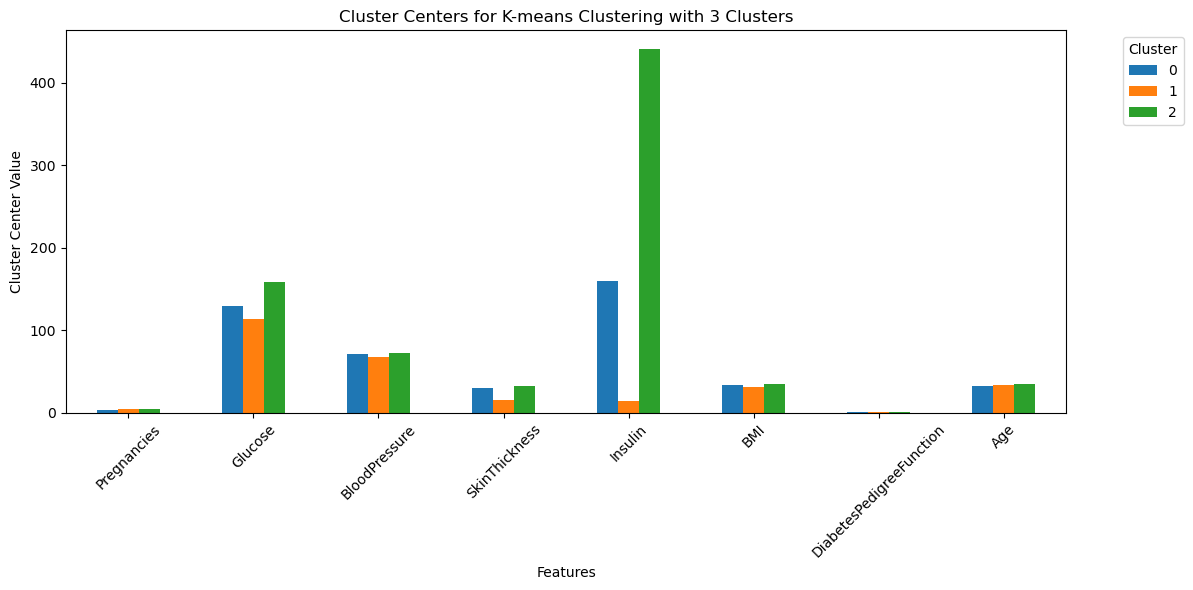

In [54]:
# Plotting the cluster centers
plt.figure(figsize=(10, 6))
cluster_centers_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Centers for K-means Clustering with 3 Clusters')
plt.xlabel('Features')
plt.ylabel('Cluster Center Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:**

The analysis reveals that individuals in Cluster 2 are at the highest risk for diabetes, while those in Cluster 1 appear to be healthier.
Cluster 0 represents a transitional group with moderate risk for diabetes. 


### **f. Finally, we give meaningful names to the clusters that reflect the types of patients. That is, if you had to describe the patients in each cluster with 2-3 keywords, how would youdo it?**

- Cluster 0: Moderate Risk Patients (Moderate Glucose)

- Cluster 1: Healthy Patients (Lower glucose and insulin levels)

- Cluster 2: High Risk Patients (High insulin and glucose levels)

### **g. Use Gaussian Mixtures to generate the clusters, comparing the result with the previous case. Discuss what you observed and reason which option you think is most appropriate.**

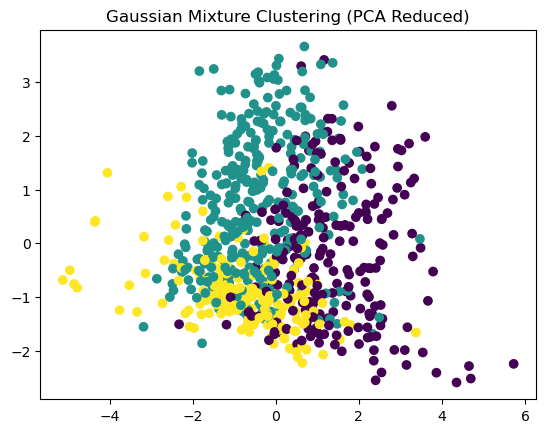

Davies-Bouldin Score (GMM): 2.351077580076209


In [58]:
# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_clusters)
diabetes_df['cluster_gmm'] = gmm_labels

# Visualizing GMM clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=diabetes_df['cluster_gmm'], cmap='viridis')
plt.title('Gaussian Mixture Clustering (PCA Reduced)')
plt.show()

# Evaluate GMM using Davies-Bouldin score
db_score_gmm = davies_bouldin_score(data_clusters, gmm_labels)
print(f'Davies-Bouldin Score (GMM): {db_score_gmm}')


**Insights:**

- Davies-Bouldin Score (K-Means): 1.6830494194043766

- Davies-Bouldin Score (GMM): 2.351077580076209.

- Based on the Davies-Bouldin Score, the K-Means model performed way better than the Gaussian Mixtures model. The lower the score the better the model
